In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv('ex1data1.csv', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


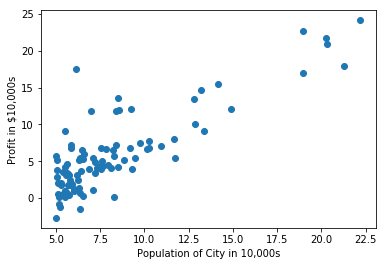

In [161]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [162]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

In [163]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)

In [164]:
print(J)

32.072733877455676


In [165]:
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

In [166]:
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [167]:
def predict(x, theta):
    prediction = np.dot(x,theta)
    return prediction

In [168]:
predict(np.array([1,10]), theta)

array([8.03333206])

In [38]:
J = computeCost(X, y, theta)
print(J)

4.483388256587726


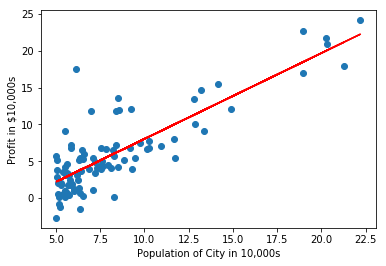

In [39]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta), c='r')
plt.show()

Interativo

In [171]:
data = pd.read_csv('ex1data1.csv', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 250
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

%matplotlib inline
import time
import pylab as pl
from IPython import display
import sys

def plot_gradient_descent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        display.clear_output(wait=True)
        display.display(pl.gcf())
        plt.scatter(X[:,1], y, c='b')
        plt.xlabel('Population of City in 10,000s')
        plt.ylabel('Profit in $10,000s')
        plt.plot(X[:,1], np.dot(X, theta), c='r')
        sys.stdout.write('Theta: '+'\n')
        sys.stdout.write(str(theta)+'\n\n')
        J = computeCost(X, y, theta)
        sys.stdout.write('Cost: '+'\n')
        sys.stdout.write('\r'+str(J))

        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp

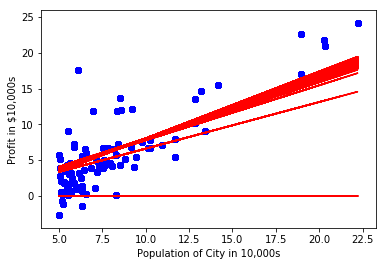

Theta: 
[[-1.35898436]
 [ 0.93818492]]

Cost: 
5.06284065372281

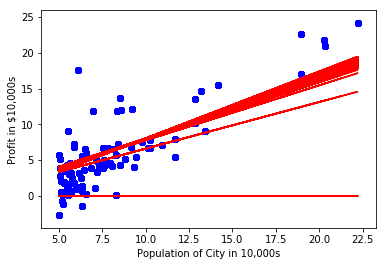

In [172]:
plot_gradient_descent(X, y, theta, alpha, iterations)

Usando Scikit-Learn

In [105]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
reg.score(X, y)

0.7020315537841397

In [107]:
reg.coef_

array([[0.        , 1.19303364]])

In [108]:
reg.intercept_ 

array([-3.89578088])

In [146]:
reg.predict(np.array([[1, 10]]))

array([[8.03455556]])